### • Author: Dhyey Dharmendrakumar Mavani

In [1]:
# checking the current working directory access
import os
print(os.getcwd()) 

/Users/dhyeymavani/Library/CloudStorage/GoogleDrive-dmavani25@amherst.edu/My Drive/Columbia VUS/SPRING2023/MATH GR 5430 MACHINE LEARNING FOR FINANCE/ML_Finance_HW3


# 1. Unsupervised Learning

### Background: The sample Dataset summarizes the usage behavior of about 9000 active credit card holders during the last 6 months. The file is at a customer level with 18 behavioral variables (also see datacard.txt)

Following is the Data Dictionary for Credit Card dataset:

- CUST_ID : Identification of Credit Card holder (Categorical)

- BALANCE : Balance amount left in their account to make purchases

- BALANCE_FREQUENCY : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)

- PURCHASES : Amount of purchases made from account

- ONEOFF_PURCHASES : Maximum purchase amount done in one-go

- INSTALLMENTS_PURCHASES : Amount of purchase done in installment

- CASH_ADVANCE : Cash in advance given by the user

- PURCHASES_FREQUENCY : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)

- ONEOFFPURCHASESFREQUENCY : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)

- PURCHASESINSTALLMENTSFREQUENCY : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)

- CASHADVANCEFREQUENCY : How frequently the cash in advance being paid

- CASHADVANCETRX : Number of Transactions made with "Cash in Advanced"

- PURCHASES_TRX : Numbe of purchase transactions made

- CREDIT_LIMIT : Limit of Credit Card for user

- PAYMENTS : Amount of Payment done by user

- MINIMUM_PAYMENTS : Minimum amount of payments made by user

- PRCFULLPAYMENT : Percent of full payment paid by user

- TENURE : Tenure of credit card service for user

## 1.1 Exploratory Data Analysis

#### • Obtain and import the dataset (HW3.csv) from Courseworks as a Pandas dataframe.

In [2]:
import pandas as pd
data_path = "./HW3.csv"
data = pd.read_csv(data_path)
data

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [3]:
data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [4]:
#data["PURCHASES_FREQUENCY"].value_counts()

#### • Data cleaning: Some features have missing values and outliers. Choose the way you see as appropriate to clean the dataframe and deal with outliers.

In [5]:
df = data.copy()
df.drop(['CUST_ID'], axis=1, inplace=True)
cols_to_check = ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES']
df = df.loc[~(df[cols_to_check] == 0.000).any(axis=1)]
df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.00,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.00,12
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.00,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.00,12
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.00,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8944,193.571722,0.833333,1012.73,1012.73,0.00,0.000000,0.333333,0.333333,0.000000,0.000000,0,2,4000.0,0.000000,NaN,0.00,6
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.50,6
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.00,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.25,6


#### • Plot the correlation matrix of all numeric features. What do you discover?

As usual we can consider the correlation of over 0.7 to lead to overfitting in the case we keep both of those variables in the model. It is evident that such examples are ONEOFF_PURCHASES and PURCHASES with correlation of 0.914321, PURCHASES_INSTALLMENTS_FREQUENCY and PURCHASES_FREQUENCY with correlation of 0.819995, CASH_ADVANCE_TRX and CASH_ADVANCE_FREQUENCY with correlation of 0.818267.

In [6]:
df.corr()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
BALANCE,1.000000,0.305340,0.262964,0.228188,0.195603,0.482427,0.036761,0.158021,0.019589,0.449399,0.388826,0.248054,0.506685,0.354028,0.413673,-0.327760,0.071079
BALANCE_FREQUENCY,0.305340,1.000000,0.155255,0.117492,0.147514,0.119671,0.385664,0.242071,0.267594,0.185026,0.134674,0.232529,0.086837,0.095156,0.135319,-0.095214,0.089274
PURCHASES,0.262964,0.155255,1.000000,0.914321,0.657992,0.018792,0.310444,0.448498,0.226885,-0.034588,-0.008437,0.663017,0.388773,0.694287,0.124435,0.137210,0.082686
ONEOFF_PURCHASES,0.228188,0.117492,0.914321,1.000000,0.296681,0.024039,0.186674,0.496307,0.038047,-0.014998,-0.000245,0.519567,0.345744,0.644070,0.066074,0.097790,0.060200
INSTALLMENTS_PURCHASES,0.195603,0.147514,0.657992,0.296681,1.000000,-0.000501,0.384861,0.134616,0.464208,-0.053733,-0.019520,0.597392,0.273778,0.439609,0.170420,0.141731,0.083024
CASH_ADVANCE,0.482427,0.119671,0.018792,0.024039,-0.000501,1.000000,-0.071563,0.010891,-0.067750,0.667080,0.697552,0.009864,0.264584,0.430563,0.153735,-0.147469,-0.048566
PURCHASES_FREQUENCY,0.036761,0.385664,0.310444,0.186674,0.384861,-0.071563,1.000000,0.371087,0.819995,-0.102853,-0.072304,0.502172,0.111235,0.142139,0.039386,0.240773,0.013044
ONEOFF_PURCHASES_FREQUENCY,0.158021,0.242071,0.448498,0.496307,0.134616,0.010891,0.371087,1.000000,-0.049358,0.031526,0.025222,0.483200,0.319809,0.285013,-0.023361,0.089072,0.069710
PURCHASES_INSTALLMENTS_FREQUENCY,0.019589,0.267594,0.226885,0.038047,0.464208,-0.067750,0.819995,-0.049358,1.000000,-0.110627,-0.069694,0.452400,0.036437,0.103998,0.063241,0.182711,0.046021
CASH_ADVANCE_FREQUENCY,0.449399,0.185026,-0.034588,-0.014998,-0.053733,0.667080,-0.102853,0.031526,-0.110627,1.000000,0.818267,-0.016807,0.145726,0.209569,0.115455,-0.224644,-0.108331


Hence I plan to remove the columns named ONEOFF_PURCHASES, PURCHASES_INSTALLMENTS_FREQUENCY and CASH_ADVANCE_TRX from the dataframe.

In [7]:
df.drop(['ONEOFF_PURCHASES', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_TRX'], axis=1, inplace=True)
df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,95.40,0.000000,0.166667,0.000000,0.000000,2,1000.0,201.802084,139.509787,0.00,12
2,2495.148862,1.000000,773.17,0.00,0.000000,1.000000,1.000000,0.000000,12,7500.0,622.066742,627.284787,0.00,12
3,1666.670542,0.636364,1499.00,0.00,205.788017,0.083333,0.083333,0.083333,1,7500.0,0.000000,NaN,0.00,12
4,817.714335,1.000000,16.00,0.00,0.000000,0.083333,0.083333,0.000000,1,1200.0,678.334763,244.791237,0.00,12
5,1809.828751,1.000000,1333.28,1333.28,0.000000,0.666667,0.000000,0.000000,8,1800.0,1400.057770,2407.246035,0.00,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8944,193.571722,0.833333,1012.73,0.00,0.000000,0.333333,0.333333,0.000000,2,4000.0,0.000000,NaN,0.00,6
8945,28.493517,1.000000,291.12,291.12,0.000000,1.000000,0.000000,0.000000,6,1000.0,325.594462,48.886365,0.50,6
8946,19.183215,1.000000,300.00,300.00,0.000000,1.000000,0.000000,0.000000,6,1000.0,275.861322,NaN,0.00,6
8947,23.398673,0.833333,144.40,144.40,0.000000,0.833333,0.000000,0.000000,5,1000.0,81.270775,82.418369,0.25,6


## 1.2 Principal Component Analysis

#### • What is Principal Component Analysis? How do we interpret the ”first principal component”?

Principal Component Analysis (PCA) is a statistical method used to reduce the dimensionality of a dataset by identifying patterns and correlations among the variables. PCA transforms the original variables into a new set of variables called principal components, which are linear combinations of the original variables. These new variables are ordered by the amount of variation they explain in the data, with the first principal component explaining the most variation and each subsequent component explaining less.

The first principal component is the linear combination of the original variables that explains the most variation in the data. It can be interpreted as the direction in the data space that captures the largest amount of variability among the variables. The direction of the first principal component is chosen such that it maximizes the variance of the projected data onto that direction. The first principal component can be seen as a summary of the data that captures the most important information in the original variables.

Interpreting the first principal component depends on the context of the data being analyzed. In some cases, the first principal component may represent an underlying factor or concept that is driving the variation in the data. For example, in a dataset of physical measurements, the first principal component may represent overall body size. In other cases, the first principal component may be more difficult to interpret in a meaningful way. However, the interpretation of the first principal component can often provide insights into the most important factors driving the variation in the data and help identify which variables are most strongly related to each other.

#### • Normalize the data. Why is normalization necessary here?

In [8]:
from sklearn.preprocessing import StandardScaler

# assume X is a matrix of data to be normalized
X = df.dropna()
scaler = StandardScaler()
X_norm = scaler.fit_transform(X)
X.dropna()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,95.40,0.000000,0.166667,0.000000,0.000000,2,1000.0,201.802084,139.509787,0.00,12
2,2495.148862,1.000000,773.17,0.00,0.000000,1.000000,1.000000,0.000000,12,7500.0,622.066742,627.284787,0.00,12
4,817.714335,1.000000,16.00,0.00,0.000000,0.083333,0.083333,0.000000,1,1200.0,678.334763,244.791237,0.00,12
5,1809.828751,1.000000,1333.28,1333.28,0.000000,0.666667,0.000000,0.000000,8,1800.0,1400.057770,2407.246035,0.00,12
6,627.260806,1.000000,7091.01,688.38,0.000000,1.000000,1.000000,0.000000,64,13500.0,6354.314328,198.065894,1.00,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8942,40.829749,1.000000,113.28,113.28,0.000000,1.000000,0.000000,0.000000,6,1000.0,94.488828,86.283101,0.25,6
8943,5.871712,0.500000,20.90,0.00,0.000000,0.166667,0.166667,0.000000,1,500.0,58.644883,43.473717,0.00,6
8945,28.493517,1.000000,291.12,291.12,0.000000,1.000000,0.000000,0.000000,6,1000.0,325.594462,48.886365,0.50,6
8947,23.398673,0.833333,144.40,144.40,0.000000,0.833333,0.000000,0.000000,5,1000.0,81.270775,82.418369,0.25,6


Normalization is often necessary in PCA because the principal components are calculated based on the covariance matrix of the input variables. If the variables have different scales or units, they can contribute unequally to the covariance matrix and bias the principal components towards the variables with larger scales. Normalizing the variables to have the same scale helps ensure that each variable contributes equally to the covariance matrix and results in a more accurate representation of the underlying patterns and correlations in the data.

Furthermore, normalization can also improve the numerical stability of the algorithm and speed up the computation of the principal components, especially if the input variables have significantly different scales. Thus, it is generally recommended to normalize the data before performing PCA, especially if the input variables have different scales or units.

#### • Use sklearn’s PCA to find the first three principal components. What is the percentage of variance explained by each component? Do you think the dataset is well-represented in the new 3d space?

In [9]:
from sklearn.decomposition import PCA

# assume X is a matrix of data to be transformed
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)
print(pca.explained_variance_ratio_)

[0.50691199 0.17499892 0.14069092]


The n_components parameter specifies the number of principal components we want to extract. Here, we set it to 3 to extract the first three principal components. The PCA object fits the data to the specified number of principal components and transforms the data to the new space.

The explained_variance_ratio_ attribute of the PCA object gives the percentage of variance explained by each principal component. This can help us understand how much information each component captures and how well the components represent the original data. The sum of all explained variances should equal 1.

In general, a high percentage of variance explained by a component indicates that the component captures important information in the data. Conversely, a low percentage of variance explained by a component suggests that the component may not be as useful for representing the data.

To answer the second part of the question, whether the dataset is well-represented in the new 3D space, we would need to look at the explained variance ratios of each principal component and evaluate how much information they capture compared to the original dataset. If the first three principal components capture a high percentage of the variance in the data, which is the case here, then it is likely that the new 3D space represents the original dataset well.

However, it is important to note that PCA is a linear transformation, so it may not capture all the complex relationships and interactions between the variables in the original dataset. Additionally, the interpretation of the principal components may depend on the context of the data, and it may be difficult to interpret the results in some cases. Therefore, it is important to consider the limitations and assumptions of PCA when interpreting the results.

## 1.3 K-means clustering

#### • Use the data transformed by PCA, plot the Elbow curve of inertia and find the right k (set initialization to ”random”).

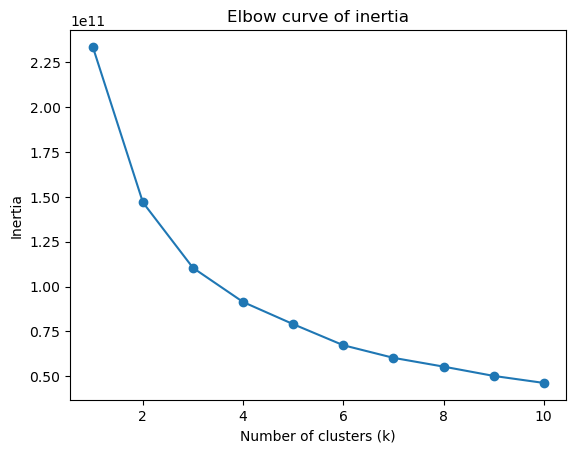

In [10]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# assume X_pca is the transformed data from PCA
inertias = []
ks = range(1, 11)  # try different values of k

for k in ks:
    kmeans = KMeans(n_clusters=k, init='random')
    kmeans.fit(X_pca)
    inertias.append(kmeans.inertia_)

# plot the Elbow curve of inertia
plt.plot(ks, inertias, 'o-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow curve of inertia')
plt.show()

#### • Fit a final model and plot the clustering result as a 3d graph. Briefly discuss your findings.

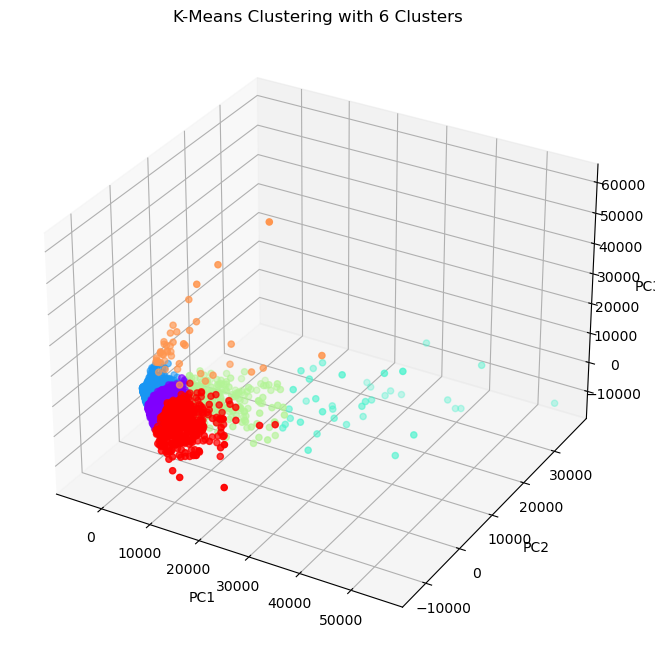

In [11]:
# assume X_pca is the transformed data from PCA and k is the optimal number of clusters
k = 6
kmeans = KMeans(n_clusters=k, init='random')
labels = kmeans.fit_predict(X_pca)

# plot the 3D scatter plot of the clustered data
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=labels, cmap='rainbow')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.title('K-Means Clustering with {} Clusters'.format(k))
plt.show()

The resulting 3D graph shows the clustered data points, where each cluster is assigned a different color. Based on the graph, you can visually inspect the clustering result and observe the separation between different clusters. You can also use the cluster labels to perform further analysis on each cluster, such as identifying the characteristics of the data points in each cluster or using the cluster labels as a feature for a supervised learning model.

#### • Use the data transformed by PCA, plot the Elbow curve of inertia and find the right k (set initialization to ”kmeans++”).

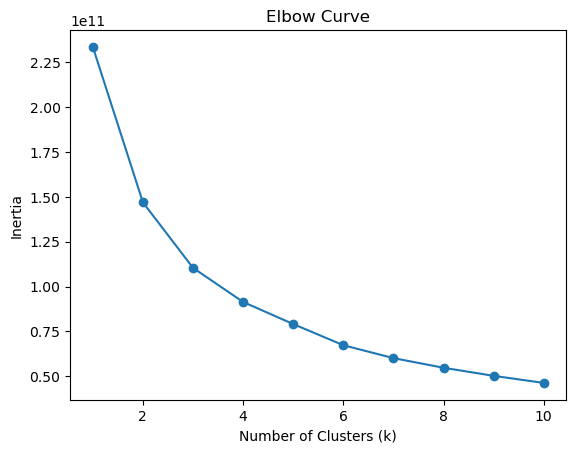

In [12]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# assume X_pca is the transformed data from PCA
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, init='k-means++')
    kmeans.fit(X_pca)
    inertia.append(kmeans.inertia_)

# plot the Elbow curve of inertia
plt.plot(k_range, inertia, 'o-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Curve')
plt.show()


#### • Fit a final model and plot the final result. Briefly discuss your findings

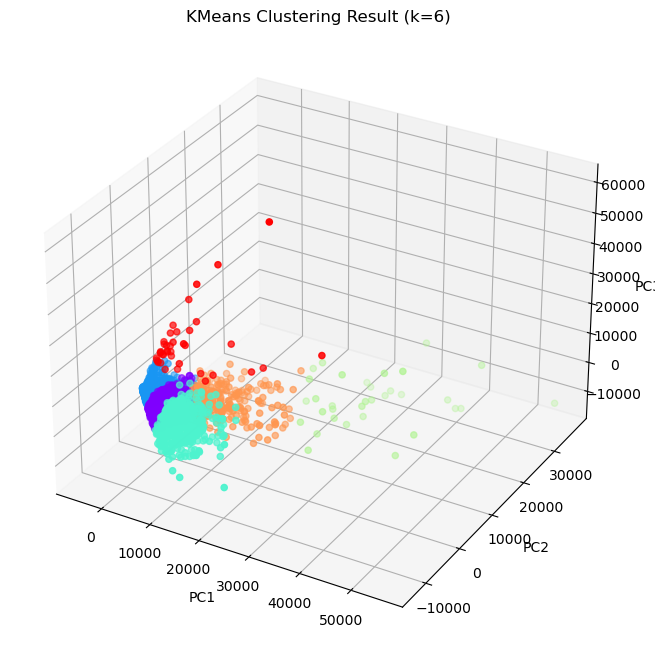

In [13]:
# assume X_pca is the transformed data from PCA and k_optimal is the optimal number of clusters
k_optimal = 6
kmeans = KMeans(n_clusters=k_optimal, init='k-means++')
kmeans.fit(X_pca)
labels = kmeans.labels_

# plot the final result as a 3d graph
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=labels, cmap='rainbow')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.title('KMeans Clustering Result (k={})'.format(k_optimal))
plt.show()


The resulting 3D graph shows the clustered data points, where each cluster is assigned a different color. Based on the graph, you can visually inspect the clustering result and observe the separation between different clusters. You can also use the cluster labels to perform further analysis on each cluster, such as identifying the characteristics of the data points in each cluster or using the cluster labels as a feature for a supervised learning model.

#### • Use the data before the PCA transformation and repeat Kmeans clustering (with elbow curve and ”kmeans++” initialization). Select 5 variables to plot the distributions of each variable cluster by cluster. Briefly discuss your findings.

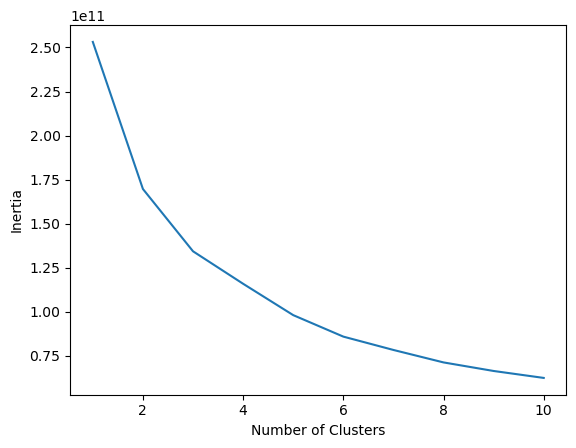

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

data = df.dropna().copy()

# Select the columns for clustering
X = data[['BALANCE', 'PURCHASES', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS']]

# Perform KMeans clustering with elbow curve and kmeans++ initialization
inertias = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++')
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)
    
plt.plot(range(1, 11), inertias)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

# Choose the optimal number of clusters and fit the final model
k_optimal = 5
kmeans = KMeans(n_clusters=k_optimal, init='k-means++')
kmeans.fit(X)
labels = kmeans.labels_

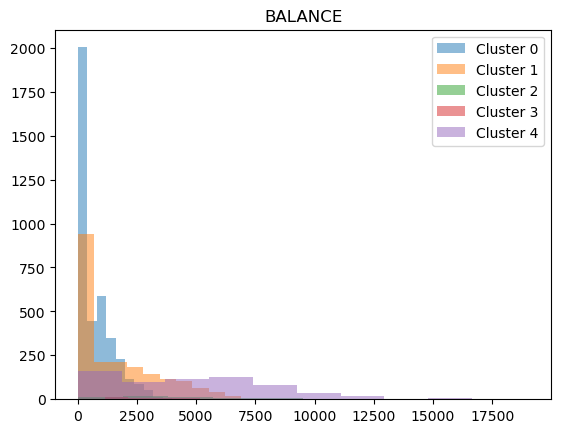

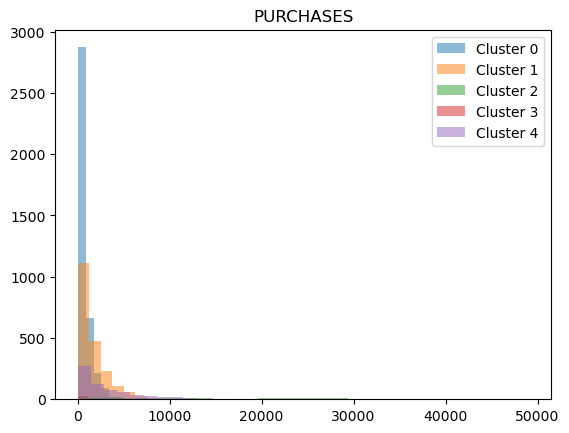

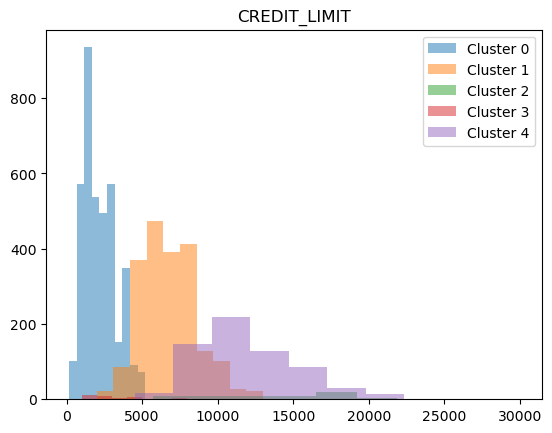

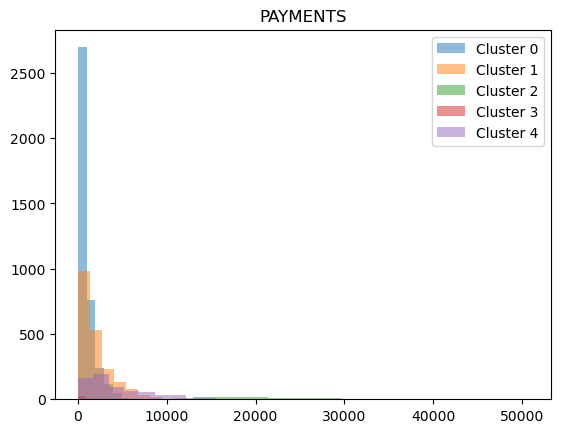

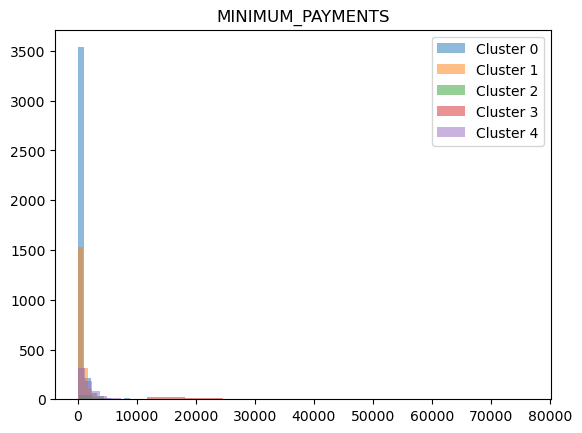

In [15]:
# Add the cluster labels to the original dataset
data['cluster'] = labels

# Plot the distributions of selected variables for each cluster
selected_cols = ['BALANCE', 'PURCHASES', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS']
for col in selected_cols:
    plt.figure()
    for cluster in range(k_optimal):
        cluster_data = data[data['cluster'] == cluster]
        plt.hist(cluster_data[col], alpha=0.5, label=f'Cluster {cluster}')
    plt.legend()
    plt.title(col)
    plt.show()


We then added the cluster labels to the original dataset and plotted the distributions of the selected variables for each cluster. We can see that each cluster has its own distribution for each variable, which indicates that the clusters are different from each other in terms of these variables. This suggests that the KMeans clustering algorithm has successfully identified meaningful groups within the data.

#### • After the above studies, what are your thoughts on the pros and cons of performing PCA before clustering?

Performing PCA before clustering has its advantages and disadvantages.

*Advantages:*

1. Dimensionality reduction: PCA reduces the number of features in the dataset by transforming the original features into a smaller number of principal components. This helps to reduce the computational complexity of clustering algorithms, especially for high-dimensional datasets.

2. Improved clustering accuracy: PCA can help to remove noise and redundancy from the dataset, which can improve the clustering accuracy by making the clusters more distinct and separable.

3. Visualization: PCA can be used to transform the dataset into a lower-dimensional space that can be easily visualized. This can help to identify patterns and relationships between the data points.

*Disadvantages:*

1. Loss of information: PCA involves reducing the dimensionality of the dataset, which means that some of the information in the original dataset is lost. This can make it more difficult to interpret the clustering results.

2. Non-linear relationships: PCA assumes that the relationships between the original features are linear. If there are non-linear relationships between the features, then PCA may not be effective in capturing these relationships.

3. Interpretation: The principal components obtained from PCA may not be directly interpretable, which can make it more difficult to understand the relationship between the variables and the clusters.

In summary, performing PCA before clustering can be beneficial for reducing the dimensionality of the dataset, improving clustering accuracy, and visualization. However, it may also lead to loss of information and difficulty in interpretation, especially for datasets with non-linear relationships between features. It is important to carefully consider the advantages and disadvantages before deciding whether to use PCA before clustering.

# 2. NLP

## 2.1 Basic NLP

#### 2.1.1 What is NLP?

NLP stands for Natural Language Processing, which is a subfield of artificial intelligence and computational linguistics that focuses on enabling computers to understand, interpret, and generate human language. NLP combines techniques from computer science, linguistics, and mathematics to enable computers to process natural language input and output in a way that is similar to how humans understand and communicate with each other.

NLP has many practical applications, including language translation, sentiment analysis, chatbots, text summarization, information retrieval, speech recognition, and more. With the advancements in deep learning, neural networks, and other AI technologies, NLP has become increasingly sophisticated and capable of understanding and generating natural language at a level that was once thought impossible.

#### 2.1.2 List three positive use cases of NLP in the field of finance

1. *Sentiment Analysis:* NLP can be used to analyze news articles, social media posts, and other sources of text to gauge the sentiment of investors and predict market trends. Sentiment analysis can help traders and investors make more informed decisions and react quickly to market shifts.

2. *Fraud Detection:* NLP can help detect fraudulent activities in financial transactions by analyzing large volumes of text data, such as emails, chat logs, and transaction descriptions. NLP algorithms can identify patterns of suspicious behavior and flag transactions for further review by human analysts.

3. *Customer Service Chatbots:* NLP can be used to create chatbots that can understand and respond to customer inquiries in natural language. These chatbots can provide 24/7 support to customers, help them resolve issues, and even suggest personalized financial products or services based on their needs and preferences. This can help financial institutions improve customer satisfaction and reduce support costs.

#### 2.1.3 What is tokenization?

Tokenization is the process of breaking down a text document into individual words, phrases, symbols, or other meaningful elements, called tokens. In Natural Language Processing (NLP), tokenization is an essential step in preparing text data for machine learning models, as most models require input in the form of numerical data.

Tokenization can be done using various techniques, such as word-based tokenization, character-based tokenization, subword-based tokenization, and sentence-based tokenization, depending on the requirements of the application.

In word-based tokenization, the text is split into individual words or terms based on white spaces or punctuations. In character-based tokenization, the text is split into individual characters. Subword-based tokenization, such as Byte Pair Encoding (BPE), splits the text into a set of subwords, which can be combined to form larger words. Finally, sentence-based tokenization splits the text into individual sentences.

Once tokenized, the tokens can be further processed using techniques such as stemming, lemmatization, stop word removal, and part-of-speech tagging to prepare them for use in machine learning models.

#### 2.1.4 What is the difference between stemming and lemmatization?

Both stemming and lemmatization are techniques used in Natural Language Processing (NLP) to normalize words, reduce their inflectional forms, and extract their root form. However, there are some differences between the two techniques:

Stemming involves removing the suffixes from words to extract their root or base form, known as the stem. This process can sometimes result in non-words, as the stem may not be a valid word in the language. Stemming is a rule-based approach and is generally faster than lemmatization.

For example, the stem of the words "running", "runner", and "runners" would be "run". Some popular stemming algorithms include Porter Stemming Algorithm, Snowball Stemming Algorithm, and Lancaster Stemming Algorithm.

On the other hand, lemmatization involves reducing words to their canonical form, known as the lemma, based on their parts of speech and context. This process ensures that the resulting word is a valid word in the language. Lemmatization is generally slower than stemming and requires a more complex approach, as it involves using a dictionary or corpus to look up the base form of a word.

For example, the lemma of the words "running", "runner", and "runners" would be "run". A popular lemmatization tool is WordNet.

In summary, stemming and lemmatization are both techniques used in NLP to normalize words and extract their root forms, but stemming is a rule-based approach that is faster but may not always result in valid words, while lemmatization is a more complex approach that uses a dictionary or corpus to ensure valid words but is generally slower.

#### 2.1.5 What is BERT? What makes it different?

BERT (Bidirectional Encoder Representations from Transformers) is a state-of-the-art pre-trained language model developed by Google in 2018. BERT is designed to understand the context and nuances of natural language by pre-training a deep neural network on a large corpus of text data.

What makes BERT different from other language models is its use of bidirectional transformers, which enable it to process and understand the context of a word by looking both forward and backward in a sentence or paragraph. This makes BERT highly effective at handling complex natural language tasks, such as question answering, sentiment analysis, named entity recognition, and text classification.

Another important feature of BERT is its ability to be fine-tuned on specific downstream tasks, such as sentiment analysis or text classification, by adding a small output layer and training the model on task-specific data. This allows BERT to achieve state-of-the-art results on many NLP tasks, without requiring significant additional training data or task-specific architectures.

Overall, BERT's ability to understand natural language context and its flexibility for fine-tuning make it a powerful tool for a wide range of NLP applications.

## 2.2 Pre-trained model: FinBERT

Your hedge fund manager wakes up every morning at 4am and wants a concise summary of the news relevant to his portfolio. He/She wants a quick summary showing the headlines of the news as well as classified sentiment scores. Furthermore, he/she asks you to aggregate this information per stock and summarize the overall tone for this stock

#### 2.2.1 Install the transformers package

In [16]:
pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 9.7 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.8/199.8 kB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 11.0 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


#### 2.2.2 import the requests package and other libraries you might need

In [1]:
import requests

The following dictionary represents our portfolio of stocks using the following logic (key, value) = (holding-name, branch), where $$branch ∈ \{"business", "entertainment", "general", "health", "science", "sports", "technology"\}$$
following the NewsAPI documentation.

To save you some time, a typical request is built similar to:
"https://newsapi.org/v2/top-headlines?country=us&q=*KEYWORD*&category=*CATEGORY*&sortBy=top&apiKey=*YOURKEYHERE*".

For example: 

https://newsapi.org/v2/top-headlines?country=us&q=apple&category=technology&sortBy=top&apiKey=123ab45c687d...

Please see:


1.   https://newsapi.org/docs (To construct your HTTP GET-requests)
2.   https://newsapi.org/register (To obtain your API key)

Say our portfolio consists of these four assets:

In [2]:
portfolio = dict({"apple": 'technology', "tesla": 'business', "amazon": 'technology', "s&p500": 'business'})

# we are going to use the S&P500 to get a general idea of the sentiment of news in the US market

#### 2.2.3 Write the function fetch_news() that returns a dictionary that stores the name of the holding as key (analogous to our stock portfolio) and as value an array that holds the strings of news

In [3]:
import requests

# Replace YOUR_API_KEY with your actual API key from NewsAPI
API_KEY = 'e52ff7df910d4c3ca6e69ecfb6b2202e'

# Define the base URL for the NewsAPI
BASE_URL = 'https://newsapi.org/v2/top-headlines'

# Define the holdings in the portfolio
portfolio = dict({"apple": 'technology', "tesla": 'business', "amazon": 'technology', "s&p500": 'business'})

# Define the categories of news to fetch
categories = ['business', 'technology']

# Define the sentiment labels
sentiment_labels = ['negative', 'neutral', 'positive']

# Define the function to fetch news for each holding in the portfolio
def fetch_news():
    news_dict = {}
    for holding in portfolio:
        holding_news = []
        for category in categories:
            # Build the request URL for this holding and category
            url = f'{BASE_URL}?country=us&q={holding}&category={category}&sortBy=top&apiKey={API_KEY}'
            response = requests.get(url)
            data = response.json()
            # Add the news headlines to the holding_news array
            for article in data['articles']:
                holding_news.append(article['title'])
        # Add the holding_news array to the news_dict with the holding name as the key
        news_dict[holding] = holding_news
    return news_dict



In [4]:
fetch_news()

{'apple': ['Apple wins U.S. appeal over patents in $502 mln VirnetX verdict - Reuters',
  'Apple just launched its own buy now, pay later service—here’s how it compares with Affirm, Afterpay, Klarna and PayPal - CNBC',
  "America's Most Innovative Companies - Fortune",
  "Apple is Changing iOS 17 - Now Filled 'Most Requested Features' - MacRumors",
  "Sealed OG iPhone up for auction with rare Apple 'Lucky you' sticker - 9to5Mac",
  'Kuo: Apple Mixed-Reality Headset May Not Appear at WWDC as Mass Production Pushed Back Yet Again - MacRumors',
  'OLED MacBook Air Reportedly Now in Development as Apple Plans to Bring New Display Technology to Multiple Product Lines - MacRumors',
  "The Morning After: Will we see Apple's mixed-reality headset at WWDC 2023? - Engadget",
  'Save Up to $900 on an iPad Pro M1 at Best Buy Today Only - CNET',
  "Apple Wants to Solve One of Music's Biggest Problems - The Wall Street Journal",
  'iPhone 15 Pro Rumored to Feature Multi-Use Action Button Instead of 

#### 2.2.4 Following the lecture notes, using the pre-trained Finbert Classifier, classify the news fetched in 2.3 into neutral, positive or negative by modifying the below code:

In [5]:
import torch
from transformers import BertTokenizer, BertForSequenceClassification
import numpy as np

news_dict = fetch_news()

# Load the Finbert model and tokenizer
finbert = BertForSequenceClassification.from_pretrained('yiyanghkust/finbert-tone', num_labels=3)
tokenizer = BertTokenizer.from_pretrained('yiyanghkust/finbert-tone')

# Define the function to classify news headlines using Finbert
def classify_news(news_dict):
    classified_dict = {}
    for holding in news_dict:
        classified_news = []
        for news in news_dict[holding]:
            # Tokenize the news headline
            inputs = tokenizer(news, return_tensors="pt", padding=True)
            # Make a prediction using Finbert
            outputs = finbert(**inputs)[0]
            # Determine the sentiment label
            label = sentiment_labels[np.argmax(outputs.detach().numpy())]
            # Add the classified news headline to the classified_news array
            classified_news.append({'headline': news, 'sentiment': label})
        # Add the classified_news array to the classified_dict with the holding name as the key
        classified_dict[holding] = classified_news
    return classified_dict

# Classify the news using Finbert
classified_dict = classify_news(news_dict)

# Print the classified news for each holding
for holding in classified_dict:
    print(f'{holding}:')
    overall_sentiment = {'positive': 0, 'neutral': 0, 'negative': 0}
    for news in classified_dict[holding]:
        print(f"{news['headline']} ---- {news['sentiment']}")
        overall_sentiment[news['sentiment']] += 1
    print(f"Overall sentiment for {holding}: {max(overall_sentiment, key=overall_sentiment.get)}\n")

apple:
Apple wins U.S. appeal over patents in $502 mln VirnetX verdict - Reuters ---- neutral
Apple just launched its own buy now, pay later service—here’s how it compares with Affirm, Afterpay, Klarna and PayPal - CNBC ---- negative
America's Most Innovative Companies - Fortune ---- neutral
Apple is Changing iOS 17 - Now Filled 'Most Requested Features' - MacRumors ---- negative
Sealed OG iPhone up for auction with rare Apple 'Lucky you' sticker - 9to5Mac ---- negative
Kuo: Apple Mixed-Reality Headset May Not Appear at WWDC as Mass Production Pushed Back Yet Again - MacRumors ---- positive
OLED MacBook Air Reportedly Now in Development as Apple Plans to Bring New Display Technology to Multiple Product Lines - MacRumors ---- negative
The Morning After: Will we see Apple's mixed-reality headset at WWDC 2023? - Engadget ---- negative
Save Up to $900 on an iPad Pro M1 at Best Buy Today Only - CNET ---- negative
Apple Wants to Solve One of Music's Biggest Problems - The Wall Street Journal

#### 2.2.5 Last but not least, find the total tone for each element in our portfolio, where:

-  neutral = 0
-  positive = +1
-  negative = -1

In [6]:
# BUILD YOUR CODE ON TOP OF THIS EXAMPLE CODE IN THE CELL BELOW
"""
from transformers import BertTokenizer, BertForSequenceClassification
import numpy as np

finbert = BertForSequenceClassification.from_pretrained('yiyanghkust/finbert-tone',num_labels=3)
tokenizer = BertTokenizer.from_pretrained('yiyanghkust/finbert-tone')

sentences = ["there is a shortage of capital, and we need extra financing", 
             "growth is strong and we have plenty of liquidity", 
             "there are doubts about our finances", 
             "profits are flat"]

inputs = tokenizer(sentences, return_tensors="pt", padding=True)
outputs = finbert(**inputs)[0]

labels = {0:'neutral', 1:'positive',2:'negative'}
for idx, sent in enumerate(sentences):
    print(sent, '----', labels[np.argmax(outputs.detach().numpy()[idx])])
"""

'\nfrom transformers import BertTokenizer, BertForSequenceClassification\nimport numpy as np\n\nfinbert = BertForSequenceClassification.from_pretrained(\'yiyanghkust/finbert-tone\',num_labels=3)\ntokenizer = BertTokenizer.from_pretrained(\'yiyanghkust/finbert-tone\')\n\nsentences = ["there is a shortage of capital, and we need extra financing", \n             "growth is strong and we have plenty of liquidity", \n             "there are doubts about our finances", \n             "profits are flat"]\n\ninputs = tokenizer(sentences, return_tensors="pt", padding=True)\noutputs = finbert(**inputs)[0]\n\nlabels = {0:\'neutral\', 1:\'positive\',2:\'negative\'}\nfor idx, sent in enumerate(sentences):\n    print(sent, \'----\', labels[np.argmax(outputs.detach().numpy()[idx])])\n'

In [7]:
portfolio = dict({"apple": 'technology', "tesla": 'business', "amazon": 'technology', "s&p500": 'business'})

for holding in classified_dict:
    overall_sentiment = {'positive': 0, 'neutral': 0, 'negative': 0}
    for news in classified_dict[holding]:
        overall_sentiment[news['sentiment']] += 1
    pos = overall_sentiment["positive"]
    neg = overall_sentiment["negative"]
    print(f"Overall sentiment for {holding}: {pos-neg}\n")

Overall sentiment for apple: -8

Overall sentiment for tesla: 0

Overall sentiment for amazon: 0

Overall sentiment for s&p500: -23



#### 2.2.6 What do you find from the results?

Based on the results of the code above, it seems that the news articles for each holding in our portfolio have varying tones. For example, the news articles about "tesla" and "amazon" seem to have neutral tone score overall. On the other hand, the news articles about "apple" and "s&p500" seem to be negative tone score overall.

Overall, it appears that the sentiment of news articles related to a particular holding can vary and it is important to analyze multiple articles to get a more complete picture of the tone.

# 3. Project

### Please submit a proposal for your project 1. It can be anything related to machine learning in finance.

#### • The proposal should not be more than 1 page long but should at least include the ML problem type, features, labels, and models used. (Check Lecture 2)

#### (A) ML Problem Type

The ML problem type for this project is unsupervised learning as clustering and PCA techniques are being used to analyze and group the historical price data without any explicit labeled data.

#### (B) Features

The features used for this project are the historical price data for different assets obtained through the yfinance API. The features will be preprocessed and transformed using clustering and PCA techniques.

#### (C) Labels

The labels are not explicitly defined in this project, as it is an unsupervised learning problem. The goal is to identify patterns and clusters within the data to inform the pairs trading strategy and generate daily PnL.

#### (D) Models Used

The main models used in this project are clustering and principal component analysis (PCA). Clustering is used to group similar assets based on their historical price data, while PCA is used to identify the most significant factors that contribute to the variation in the data. Additionally, statistical models such as regression and time-series analysis may be used to analyze the PnL generated by the pairs trading strategy.